In [6]:
import json
import requests
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# From openuv 
api_key = "openuv-kdbrloda6ad6-io"

# headers for api call
headers = {
    "x-access-token": api_key,
    "Content-Type": "application/json"
}

lat = 34.11
lng = -117.70
alt = 100
dt = datetime.now()
# Create url with api key above

url = "https://api.openuv.io/api/v1/forecast?lat={}&lng={}&alt={}&dt={}".format(lat,lng,alt,dt)

request = requests.get(url= url, headers=headers)
data = request.json()
df = pd.json_normalize(data['result'])
df = df.drop('sun_position.azimuth', axis = 1)
df = df.drop('sun_position.altitude', axis = 1)
df['uv_time'] = pd.to_datetime(df['uv_time'], format='ISO8601')
df['Time'] = pd.to_datetime(df['uv_time'])
dti = pd.DatetimeIndex(data=df['Time'],freq='infer')
dti.tz_convert('US/Pacific')
df['uv_time'] = dti
df['uv_time'].dt.tz_convert('utc')
df['uv_time'].dt.tz_convert('US/Pacific')
df = df.drop('uv_time')
df['Time'] = df['Time'].dt.strftime('%H:%M')
print(df)

        uv                          uv_time   Time
0   0.0000 2023-10-30 14:09:40.842000+00:00  14:09
1   0.2241 2023-10-30 15:09:40.842000+00:00  15:09
2   0.8761 2023-10-30 16:09:40.842000+00:00  16:09
3   2.0069 2023-10-30 17:09:40.842000+00:00  17:09
4   3.0867 2023-10-30 18:09:40.842000+00:00  18:09
5   3.6063 2023-10-30 19:09:40.842000+00:00  19:09
6   3.6063 2023-10-30 20:09:40.842000+00:00  20:09
7   2.9237 2023-10-30 21:09:40.842000+00:00  21:09
8   1.7318 2023-10-30 22:09:40.842000+00:00  22:09
9   0.7946 2023-10-30 23:09:40.842000+00:00  23:09
10  0.1834 2023-10-31 00:09:40.842000+00:00  00:09


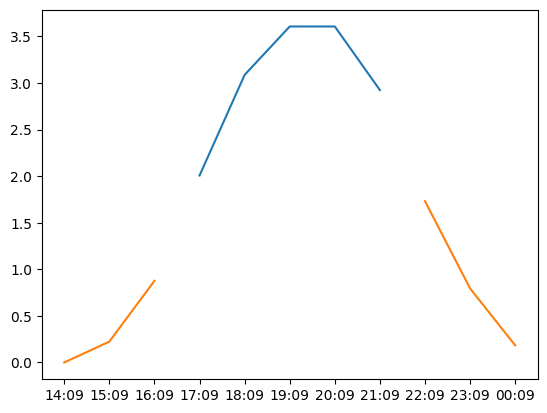

In [15]:
upper = 6.0
lower = 5.0
supper = np.ma.masked_where(df['uv'] < upper, df['uv'])
slower = np.ma.masked_where(df['uv'] > lower, df['uv'])
smiddle = np.ma.masked_where((df['uv'] < lower) | (df['uv'] > upper), df['uv'])
fig, ax = plt.subplots()
ax.plot(df['Time'],smiddle, df['Time'], slower,df['Time'],supper)
plt.show() 
  